{}

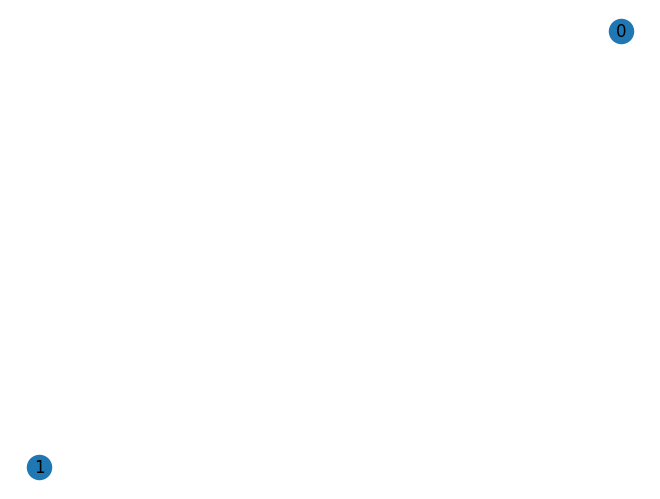

In [2]:
import networkx as nx
from geopy.distance import geodesic

# Defina suas coordenadas
coordenadas = [
    (40.748817, -73.985428), # Exemplo de coordenadas
    (37.774929, -122.419416),
    # Adicione mais coordenadas aqui
]

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós para cada coordenada
for i, coord in enumerate(coordenadas):
    G.add_node(i, pos=coord)

# Adicionar arestas entre coordenadas próximas
for i, coord1 in enumerate(coordenadas):
    for j, coord2 in enumerate(coordenadas):
        if i != j: # Para evitar laços
            distancia = geodesic(coord1, coord2).km
            if distancia < 50: # Adicionar uma aresta se a distância for menor que 50 km
                G.add_edge(i, j, weight=distancia)

# Desenhar o grafo
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

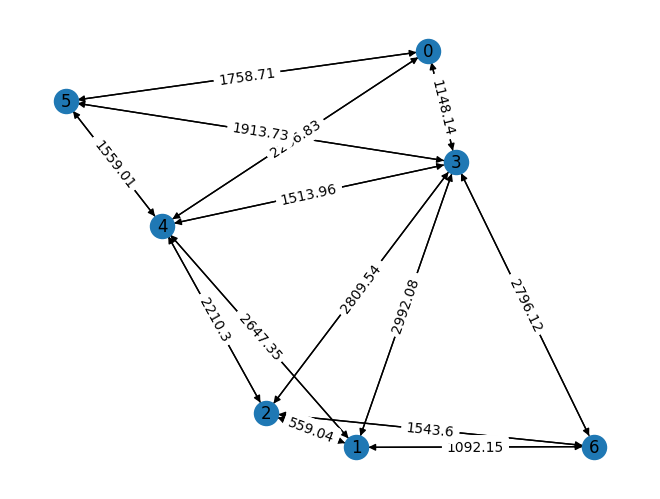

In [5]:
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

# Defina suas coordenadas
coordenadas = [
    (40.748817, -73.985428), # Nova York
    (37.774929, -122.419416), # São Francisco
    (34.052235, -118.243683), # Los Angeles
    (41.878113, -87.629799), # Chicago
    (29.760427, -95.369804), # Houston
    (25.761681, -80.191788), # Miami
    (47.606209, -122.332069)  # Seattle
]

# A ordem dos nós no grafo é determinada pela ordem em que as coordenadas são enumeradas na lista coordenadas.

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós para cada coordenada
for i, coord in enumerate(coordenadas):
    G.add_node(i, pos=coord)

# Adicionar arestas entre coordenadas próximas
for i, coord1 in enumerate(coordenadas):
    for j, coord2 in enumerate(coordenadas):
        if i != j: # Para evitar laços
            distancia = geodesic(coord1, coord2).km
            if distancia < 3000: # Adicionar uma aresta se a distância for menor que 3000 km
                G.add_edge(i, j, weight=distancia)

# Desenhar o grafo
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
for key in labels:
    labels[key] = round(labels[key], 2) # Arredondando para duas casas decimais
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()